# Evaluating the Impact of Policy Interventions on Fatal Police Shootings: 
## A Causal Inference Approach Using Instrumental Variable

### 01. Import Common Packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from graphviz import Digraph
import statsmodels

# Optional: Set the aesthetic style of the plots
sns.set(style="whitegrid")

### 02. Import Dataset

In [4]:
df_fatal = pd.read_csv('../dataset/fatal-police-shootings-data.csv')
df_fatal.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [5]:
df_fatal.shape

(8002, 17)

In [6]:
df_fatal.describe()

,id,age,longitude,latitude
count,8002.000000,7499.000000,7162.000000,7162.000000
mean,4415.429643,37.209228,-97.040644,36.675719
std,2497.153259,12.979490,16.524975,5.379965
min,3.000000,2.000000,-160.007000,19.498000
25%,2240.250000,27.000000,-112.028250,33.480000
50%,4445.500000,35.000000,-94.315000,36.105000
75%,6579.750000,45.000000,-83.151500,40.026750
max,8696.000000,92.000000,-67.867000,71.301000


In [7]:
df_fatal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8002 non-null   int64  
 1   name                     7548 non-null   object 
 2   date                     8002 non-null   object 
 3   manner_of_death          8002 non-null   object 
 4   armed                    7791 non-null   object 
 5   age                      7499 non-null   float64
 6   gender                   7971 non-null   object 
 7   race                     6485 non-null   object 
 8   city                     8002 non-null   object 
 9   state                    8002 non-null   object 
 10  signs_of_mental_illness  8002 non-null   bool   
 11  threat_level             8002 non-null   object 
 12  flee                     7036 non-null   object 
 13  body_camera              8002 non-null   bool   
 14  longitude               

In [8]:
# Check for missing values
missing_values = df_fatal.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate data
duplicate_data = df_fatal.duplicated().sum()
print("\nDuplicate Data Count:", duplicate_data)

Missing Values:
 id                            0
name                        454
date                          0
manner_of_death               0
armed                       211
age                         503
gender                       31
race                       1517
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        966
body_camera                   0
longitude                   840
latitude                    840
is_geocoding_exact            0
dtype: int64

Duplicate Data Count: 0


#### 03. Exploratory Data Analysis

In this section, we will perform exploratory data analysis (EDA) on the `df_fatal` dataset to understand the distribution and relationships between different variables. This will help us gain insights into the data and identify any patterns or anomalies.

1. **Distribution of Age**:
    - Plot the distribution of age to understand the age range of individuals involved in fatal police shootings.

2. **Gender Distribution**:
    - Analyze the gender distribution to see the proportion of male and female individuals.

3. **Race Distribution**:
    - Examine the race distribution to understand the racial demographics of the individuals.

4. **Manner of Death**:
    - Investigate the manner of death to see the most common methods.

5. **Signs of Mental Illness**:
    - Analyze the presence of signs of mental illness in the individuals.

6. **Threat Level**:
    - Explore the threat level to understand the perceived threat by the police.

7. **Fleeing Status**:
    - Examine the fleeing status to see how many individuals were fleeing at the time of the incident.

8. **Body Camera Usage**:
    - Investigate the usage of body cameras during the incidents.

9. **Geographical Distribution**:
    - Plot the geographical distribution of incidents to see the locations where they occurred.
```

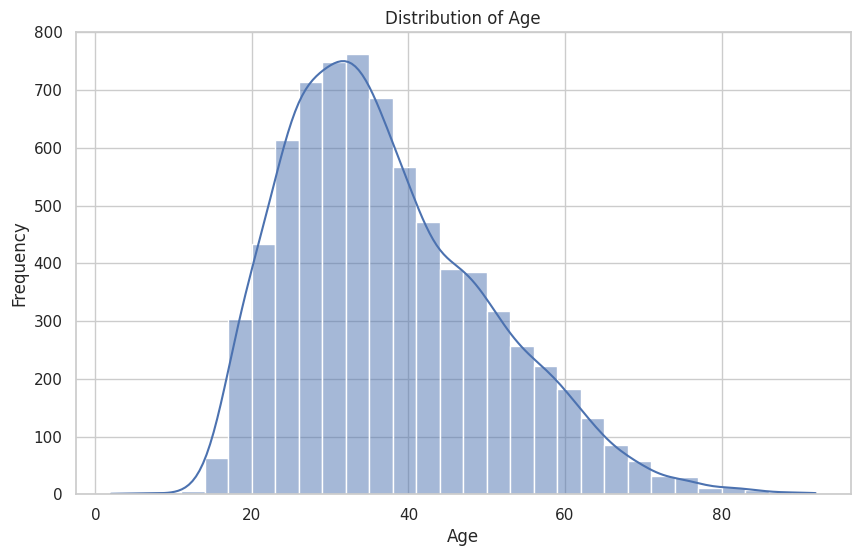

In [9]:
# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df_fatal['age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

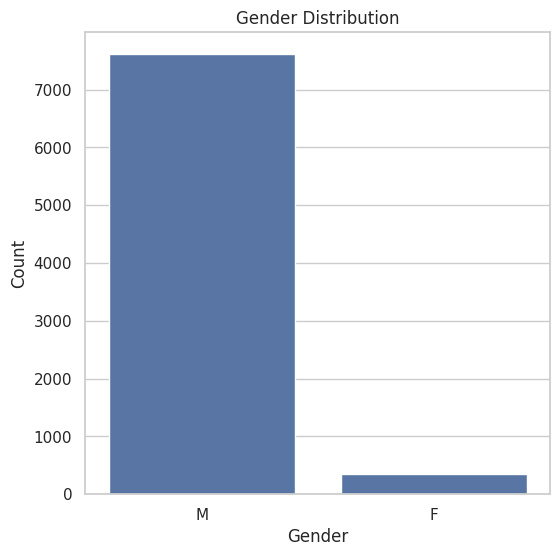

In [10]:
# 2. Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data=df_fatal)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

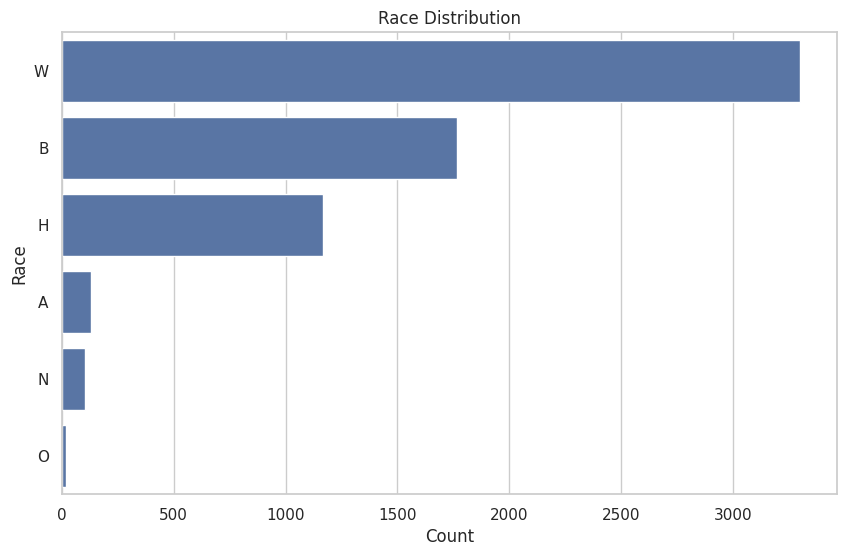

In [11]:
# 3. Race Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='race', data=df_fatal, order=df_fatal['race'].value_counts().index)
plt.title('Race Distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

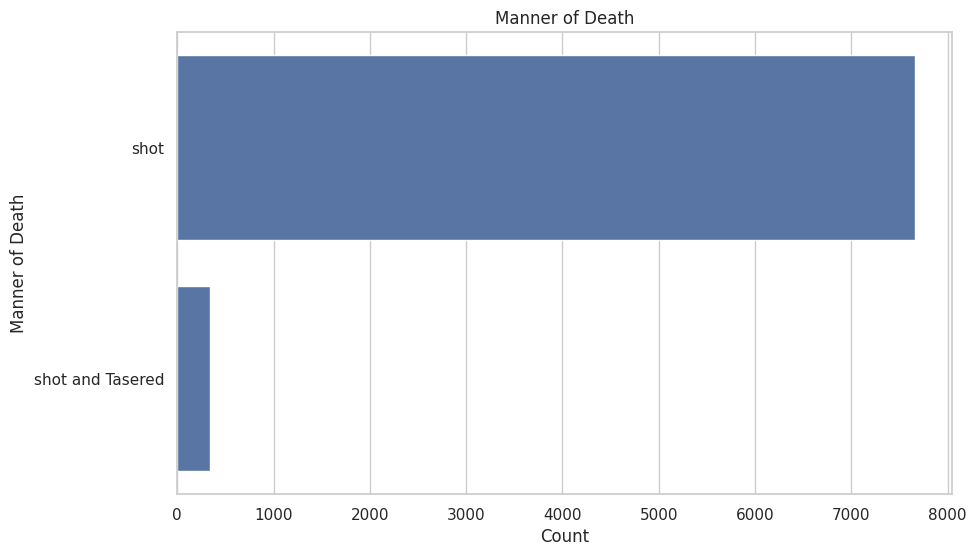

In [12]:
# 4. Manner of Death
plt.figure(figsize=(10, 6))
sns.countplot(y='manner_of_death', data=df_fatal, order=df_fatal['manner_of_death'].value_counts().index)
plt.title('Manner of Death')
plt.xlabel('Count')
plt.ylabel('Manner of Death')
plt.show()


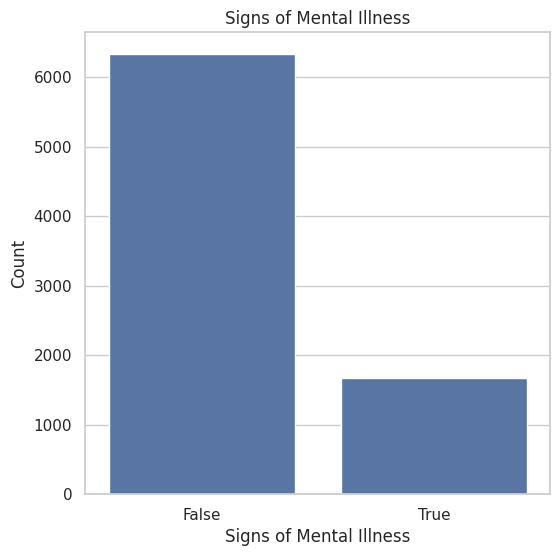

In [13]:
# 5. Signs of Mental Illness
plt.figure(figsize=(6, 6))
sns.countplot(x='signs_of_mental_illness', data=df_fatal)
plt.title('Signs of Mental Illness')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.show()

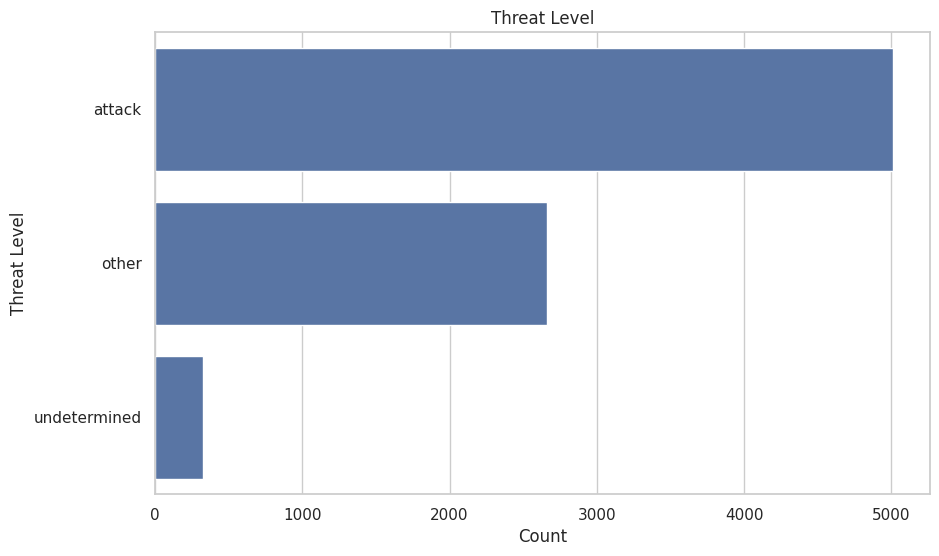

In [14]:
# 6. Threat Level
plt.figure(figsize=(10, 6))
sns.countplot(y='threat_level', data=df_fatal, order=df_fatal['threat_level'].value_counts().index)
plt.title('Threat Level')
plt.xlabel('Count')
plt.ylabel('Threat Level')
plt.show()

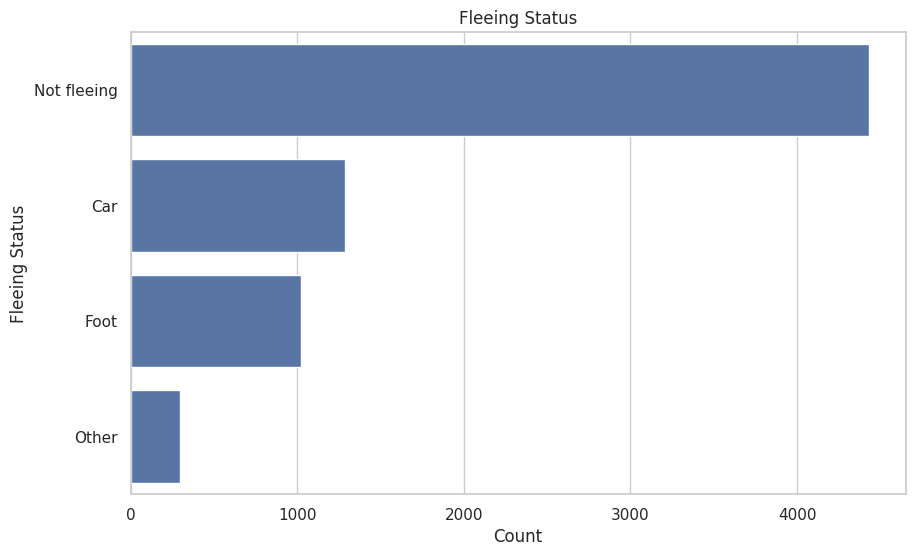

In [15]:
# 7. Fleeing Status
plt.figure(figsize=(10, 6))
sns.countplot(y='flee', data=df_fatal, order=df_fatal['flee'].value_counts().index)
plt.title('Fleeing Status')
plt.xlabel('Count')
plt.ylabel('Fleeing Status')
plt.show()

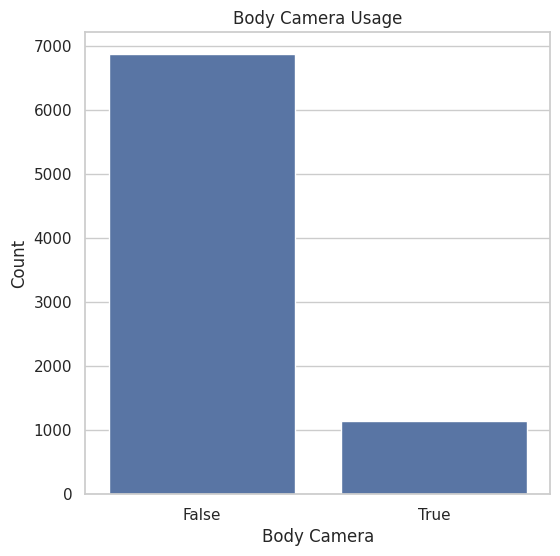

In [16]:
# 8. Body Camera Usage
plt.figure(figsize=(6, 6))
sns.countplot(x='body_camera', data=df_fatal)
plt.title('Body Camera Usage')
plt.xlabel('Body Camera')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_6238/1220803828.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')


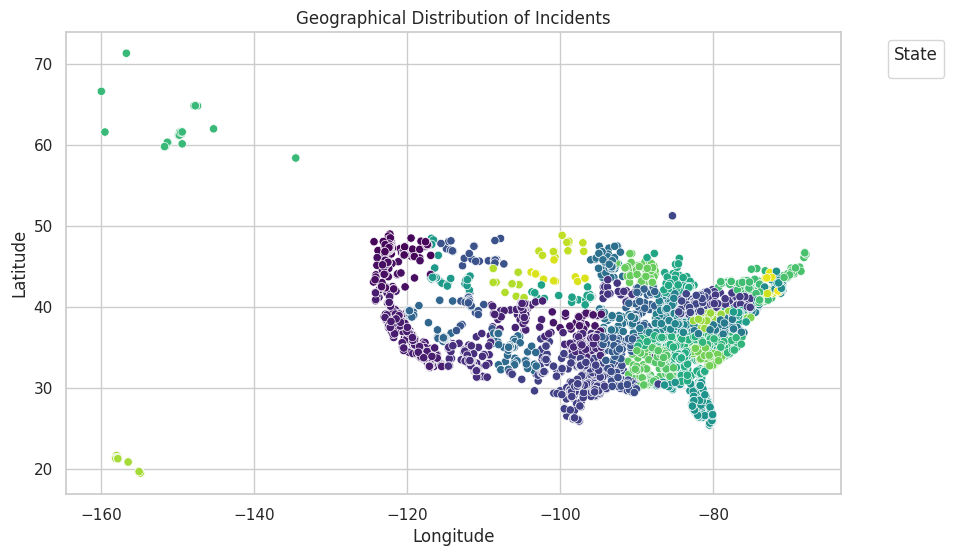

In [17]:
# 9. Geographical Distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=df_fatal, hue='state', palette='viridis', legend=False)
plt.title('Geographical Distribution of Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights from Geographical Distribution of Incidents

1. **Geographical Spread**:
    - The scatter plot shows that fatal police shootings are distributed across the entire United States, with incidents occurring in both urban and rural areas.

2. **High-Density Areas**:
    - There are noticeable clusters of incidents in certain states, indicating higher occurrences of fatal police shootings. States like California, Texas, and Florida show a higher density of incidents.

3. **Urban vs. Rural**:
    - Major cities such as Los Angeles, Chicago, and New York have a higher concentration of incidents, which is expected due to their larger populations. However, rural areas are not exempt, and incidents are spread across less populated regions as well.

4. **State-wise Distribution**:
    - The plot highlights the variation in the number of incidents across different states. Some states have significantly more incidents compared to others, which could be due to differences in population size, law enforcement practices, or other socio-economic factors.

5. **Latitude and Longitude**:
    - The latitude and longitude coordinates provide a precise geographical location for each incident, allowing for a detailed spatial analysis. This can help in identifying specific regions within states that may have higher occurrences of fatal police shootings.

6. **Potential Correlations**:
    - By examining the geographical distribution in conjunction with other variables such as race, age, and signs of mental illness, we can explore potential correlations and patterns that may exist in different regions.

7. **Policy Implications**:
    - Understanding the geographical distribution of fatal police shootings can inform policymakers and law enforcement agencies about areas that may require targeted interventions, training, or resources to address and reduce the occurrence of such incidents.###

### Insights from Exploratory Data Analysis (EDA)

1. **Distribution of Age**:
    - The age distribution shows a wide range of ages involved in fatal police shootings, with a noticeable peak around the mid-20s to early 30s.

2. **Gender Distribution**:
    - The majority of individuals involved in fatal police shootings are male.

3. **Race Distribution**:
    - The race distribution indicates that a significant proportion of the individuals are from certain racial groups, with a notable representation of White and Black individuals.

4. **Manner of Death**:
    - The most common manner of death is by shooting, with a smaller proportion involving both shooting and Taser usage.

5. **Signs of Mental Illness**:
    - A considerable number of individuals showed signs of mental illness at the time of the incident.

6. **Threat Level**:
    - The perceived threat level by the police is predominantly categorized as "attack," with fewer instances categorized as "other" or "undetermined."

7. **Fleeing Status**:
    - Most individuals were not fleeing at the time of the incident, with a smaller proportion attempting to flee.

8. **Body Camera Usage**:
    - The usage of body cameras during these incidents is relatively low.

9. **Geographical Distribution**:
    - The geographical distribution of incidents shows that fatal police shootings occur across various states, with some states having higher occurrences than others.


#### Manner of Death vs Other Feature

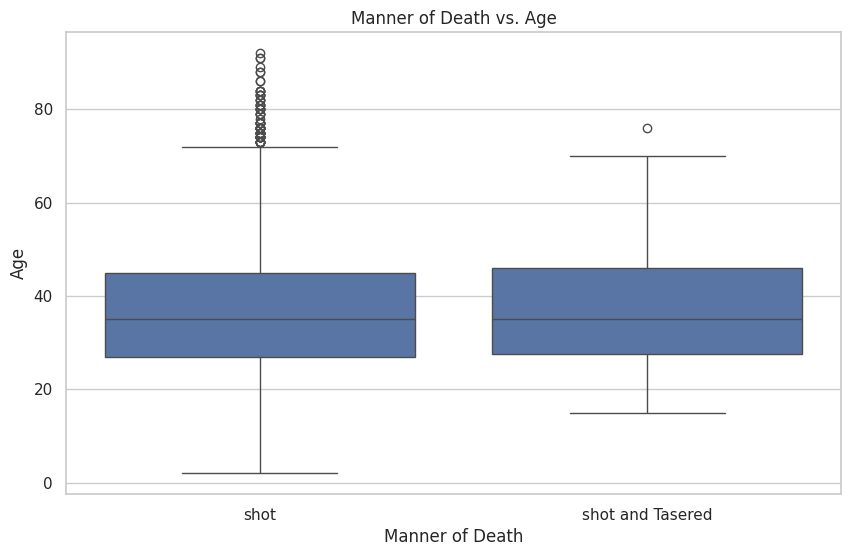

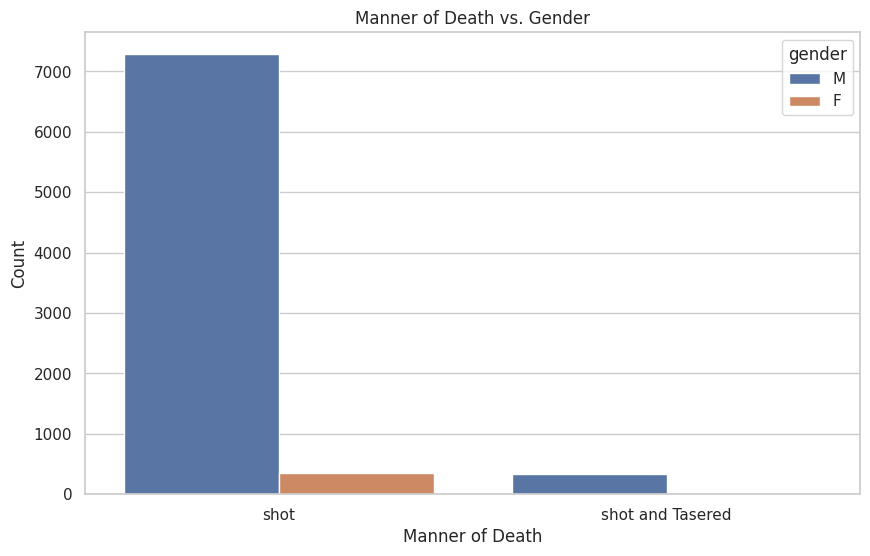

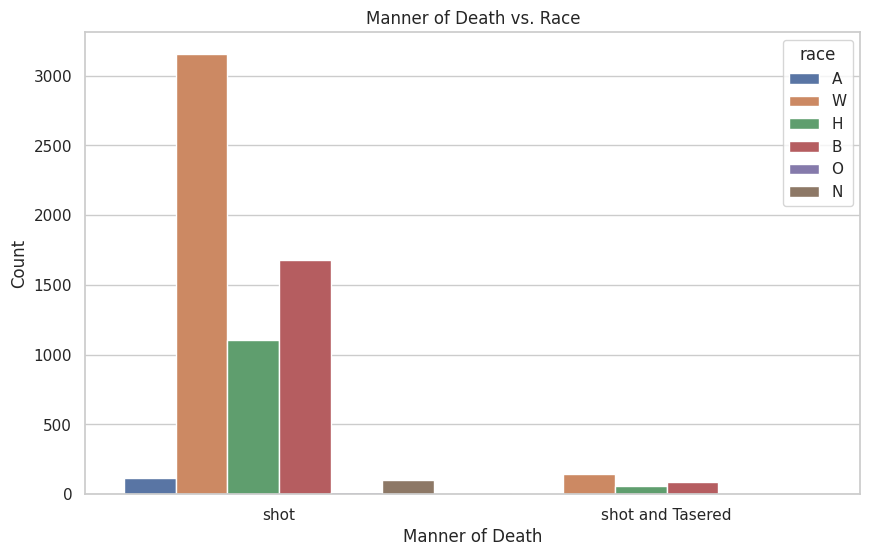

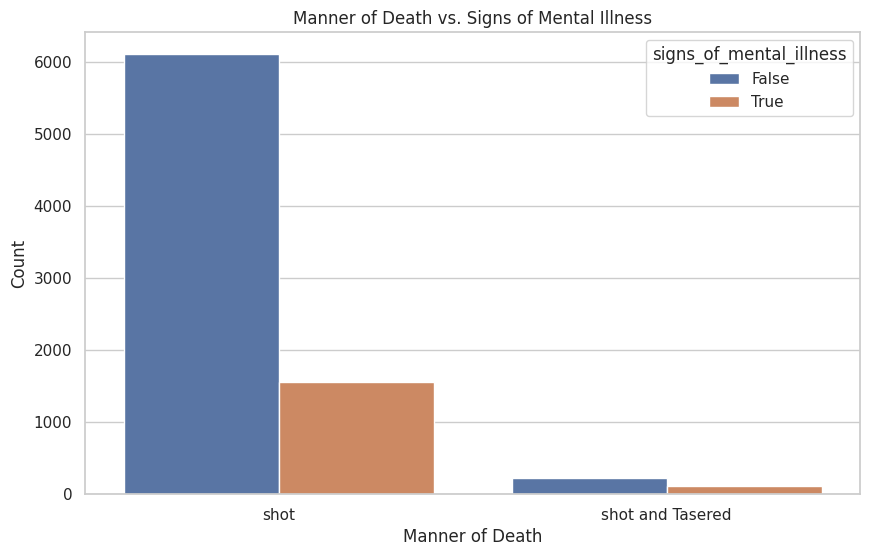

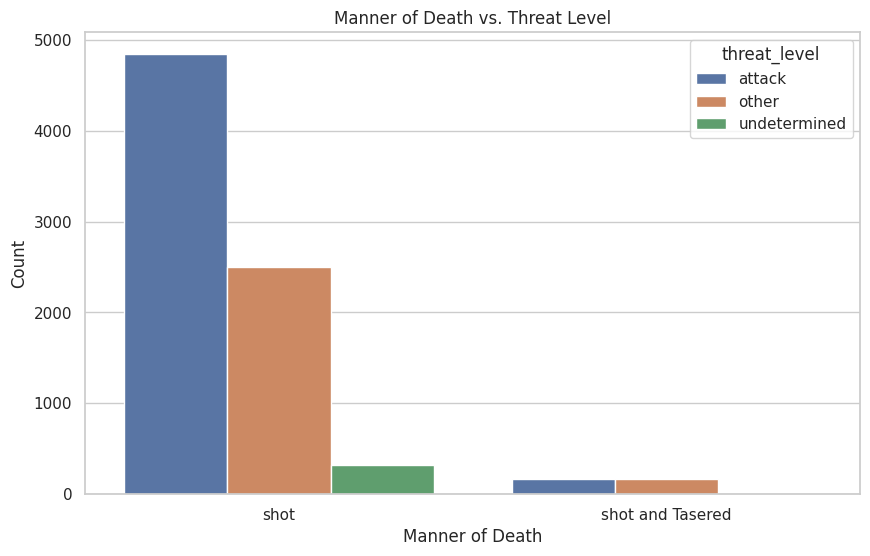

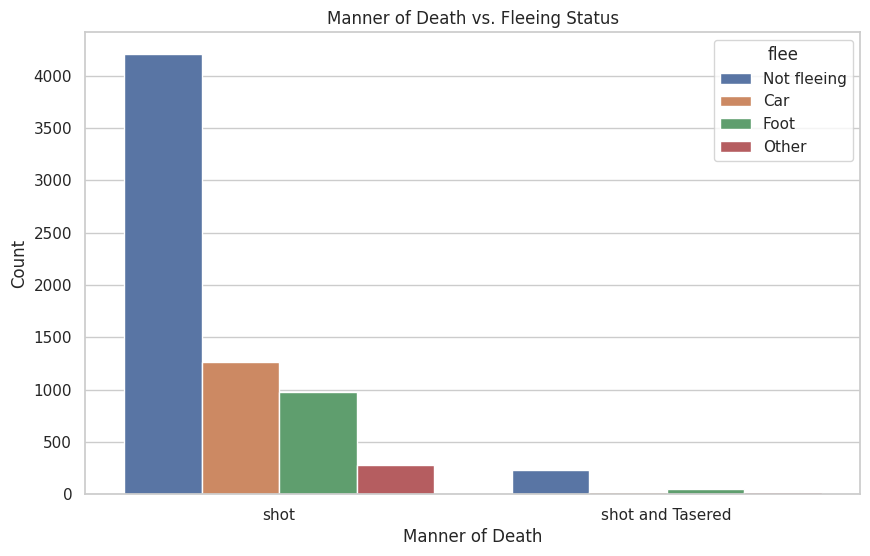

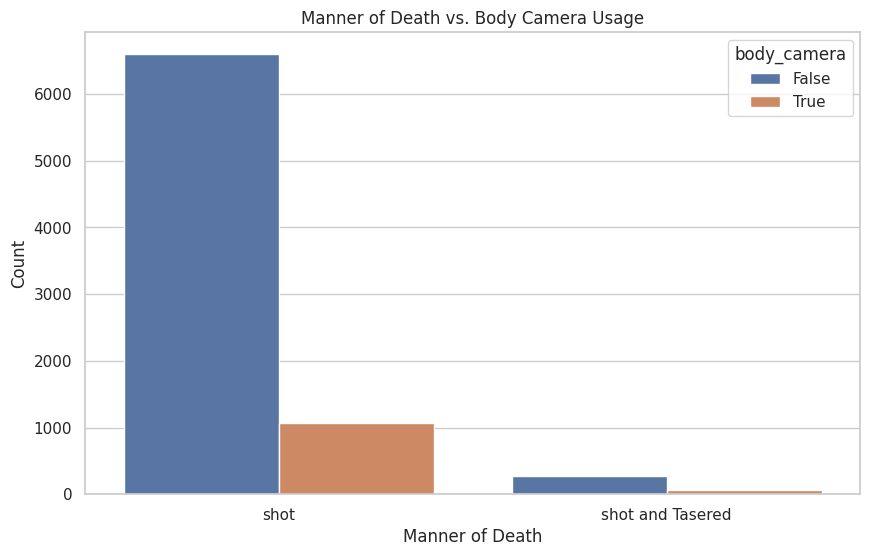

In [18]:
# 1. Manner of Death vs. Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='manner_of_death', y='age', data=df_fatal)
plt.title('Manner of Death vs. Age')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.show()

# 2. Manner of Death vs. Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='manner_of_death', hue='gender', data=df_fatal)
plt.title('Manner of Death vs. Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.show()

# 3. Manner of Death vs. Race
plt.figure(figsize=(10, 6))
sns.countplot(x='manner_of_death', hue='race', data=df_fatal)
plt.title('Manner of Death vs. Race')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.show()

# 4. Manner of Death vs. Signs of Mental Illness
plt.figure(figsize=(10, 6))
sns.countplot(x='manner_of_death', hue='signs_of_mental_illness', data=df_fatal)
plt.title('Manner of Death vs. Signs of Mental Illness')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.show()

# 5. Manner of Death vs. Threat Level
plt.figure(figsize=(10, 6))
sns.countplot(x='manner_of_death', hue='threat_level', data=df_fatal)
plt.title('Manner of Death vs. Threat Level')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.show()

# 6. Manner of Death vs. Fleeing Status
plt.figure(figsize=(10, 6))
sns.countplot(x='manner_of_death', hue='flee', data=df_fatal)
plt.title('Manner of Death vs. Fleeing Status')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.show()

# 7. Manner of Death vs. Body Camera Usage
plt.figure(figsize=(10, 6))
sns.countplot(x='manner_of_death', hue='body_camera', data=df_fatal)
plt.title('Manner of Death vs. Body Camera Usage')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.show()

### Insights from Manner of Death vs Other Features

1. **Manner of Death vs. Age**:
    - The boxplot shows that the age distribution for individuals who were shot is quite wide, with a median age around the mid-30s. For those who were both shot and Tasered, the age range is narrower, with a median age in the mid-20s.

2. **Manner of Death vs. Gender**:
    - The countplot indicates that males are predominantly involved in fatal police shootings, regardless of the manner of death. There are very few female individuals in the dataset.

3. **Manner of Death vs. Race**:
    - The countplot reveals that White and Black individuals are the most represented racial groups in fatal police shootings. The distribution is similar for both manners of death (shot and shot and Tasered).

4. **Manner of Death vs. Signs of Mental Illness**:
    - The countplot shows that a significant number of individuals who were shot exhibited signs of mental illness. This trend is also observed, though to a lesser extent, for individuals who were both shot and Tasered.

5. **Manner of Death vs. Threat Level**:
    - The countplot indicates that the majority of fatal police shootings are categorized under the "attack" threat level. This is consistent across both manners of death.

6. **Manner of Death vs. Fleeing Status**:
    - The countplot shows that most individuals were not fleeing at the time of the incident, regardless of the manner of death. There are fewer instances of individuals attempting to flee.

7. **Manner of Death vs. Body Camera Usage**:
    - The countplot reveals that body camera usage is relatively low during fatal police shootings. This trend is consistent across both manners of death.

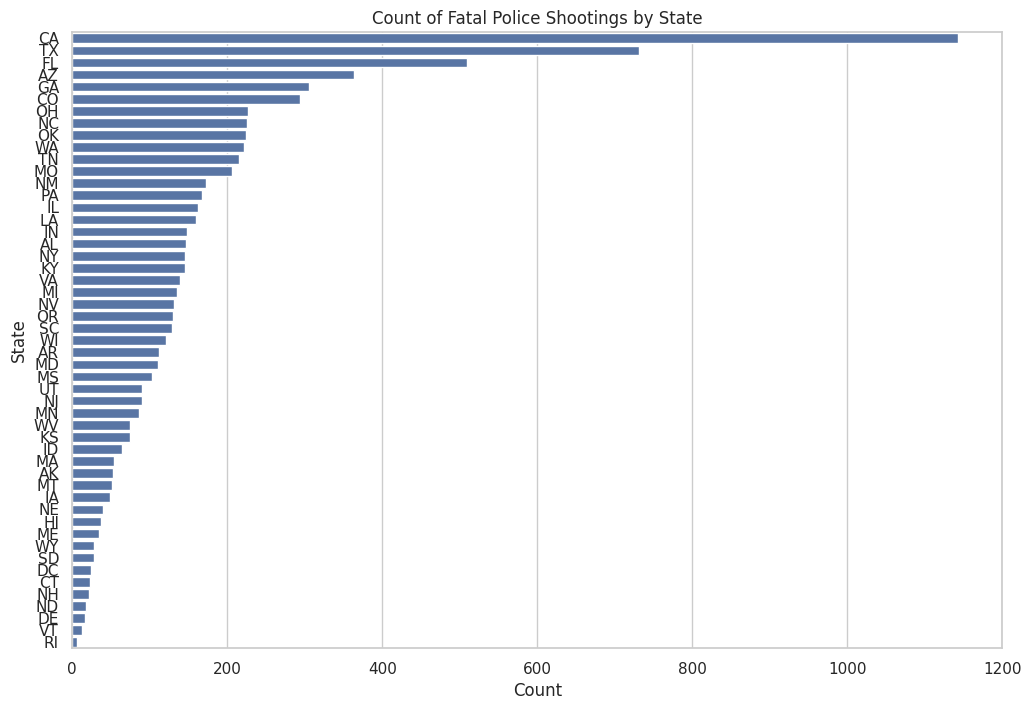

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(y='state', data=df_fatal, order=df_fatal['state'].value_counts().index)
plt.title('Count of Fatal Police Shootings by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

In [20]:
# Separate numerical columns
numerical_df = df_fatal.select_dtypes(include=['number']).drop(columns=['id'])

# Separate categorical columns
categorical_df = df_fatal.select_dtypes(exclude=['number']).drop(columns=['name', 'date', 'city', 'armed', 'state'])

# One-hot encode the categorical dataframe
categorical_encoded_df = pd.get_dummies(categorical_df)

# Concatenate the one-hot encoded categorical dataframe with the numerical dataframe
final_df = pd.concat([numerical_df, categorical_encoded_df], axis=1)

final_df.head()

,age,longitude,latitude,signs_of_mental_illness,body_camera,is_geocoding_exact,manner_of_death_shot,manner_of_death_shot and Tasered,gender_F,gender_M,...,race_N,race_O,race_W,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other
0,53.0,-123.122,47.247,True,False,True,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
1,47.0,-122.892,45.487,False,False,True,True,False,False,True,...,False,False,True,True,False,False,False,False,True,False
2,23.0,-97.281,37.695,False,False,True,False,True,False,True,...,False,False,False,False,True,False,False,False,True,False
3,32.0,-122.422,37.763,True,False,True,True,False,False,True,...,False,False,True,True,False,False,False,False,True,False
4,39.0,-104.692,40.384,False,False,True,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False


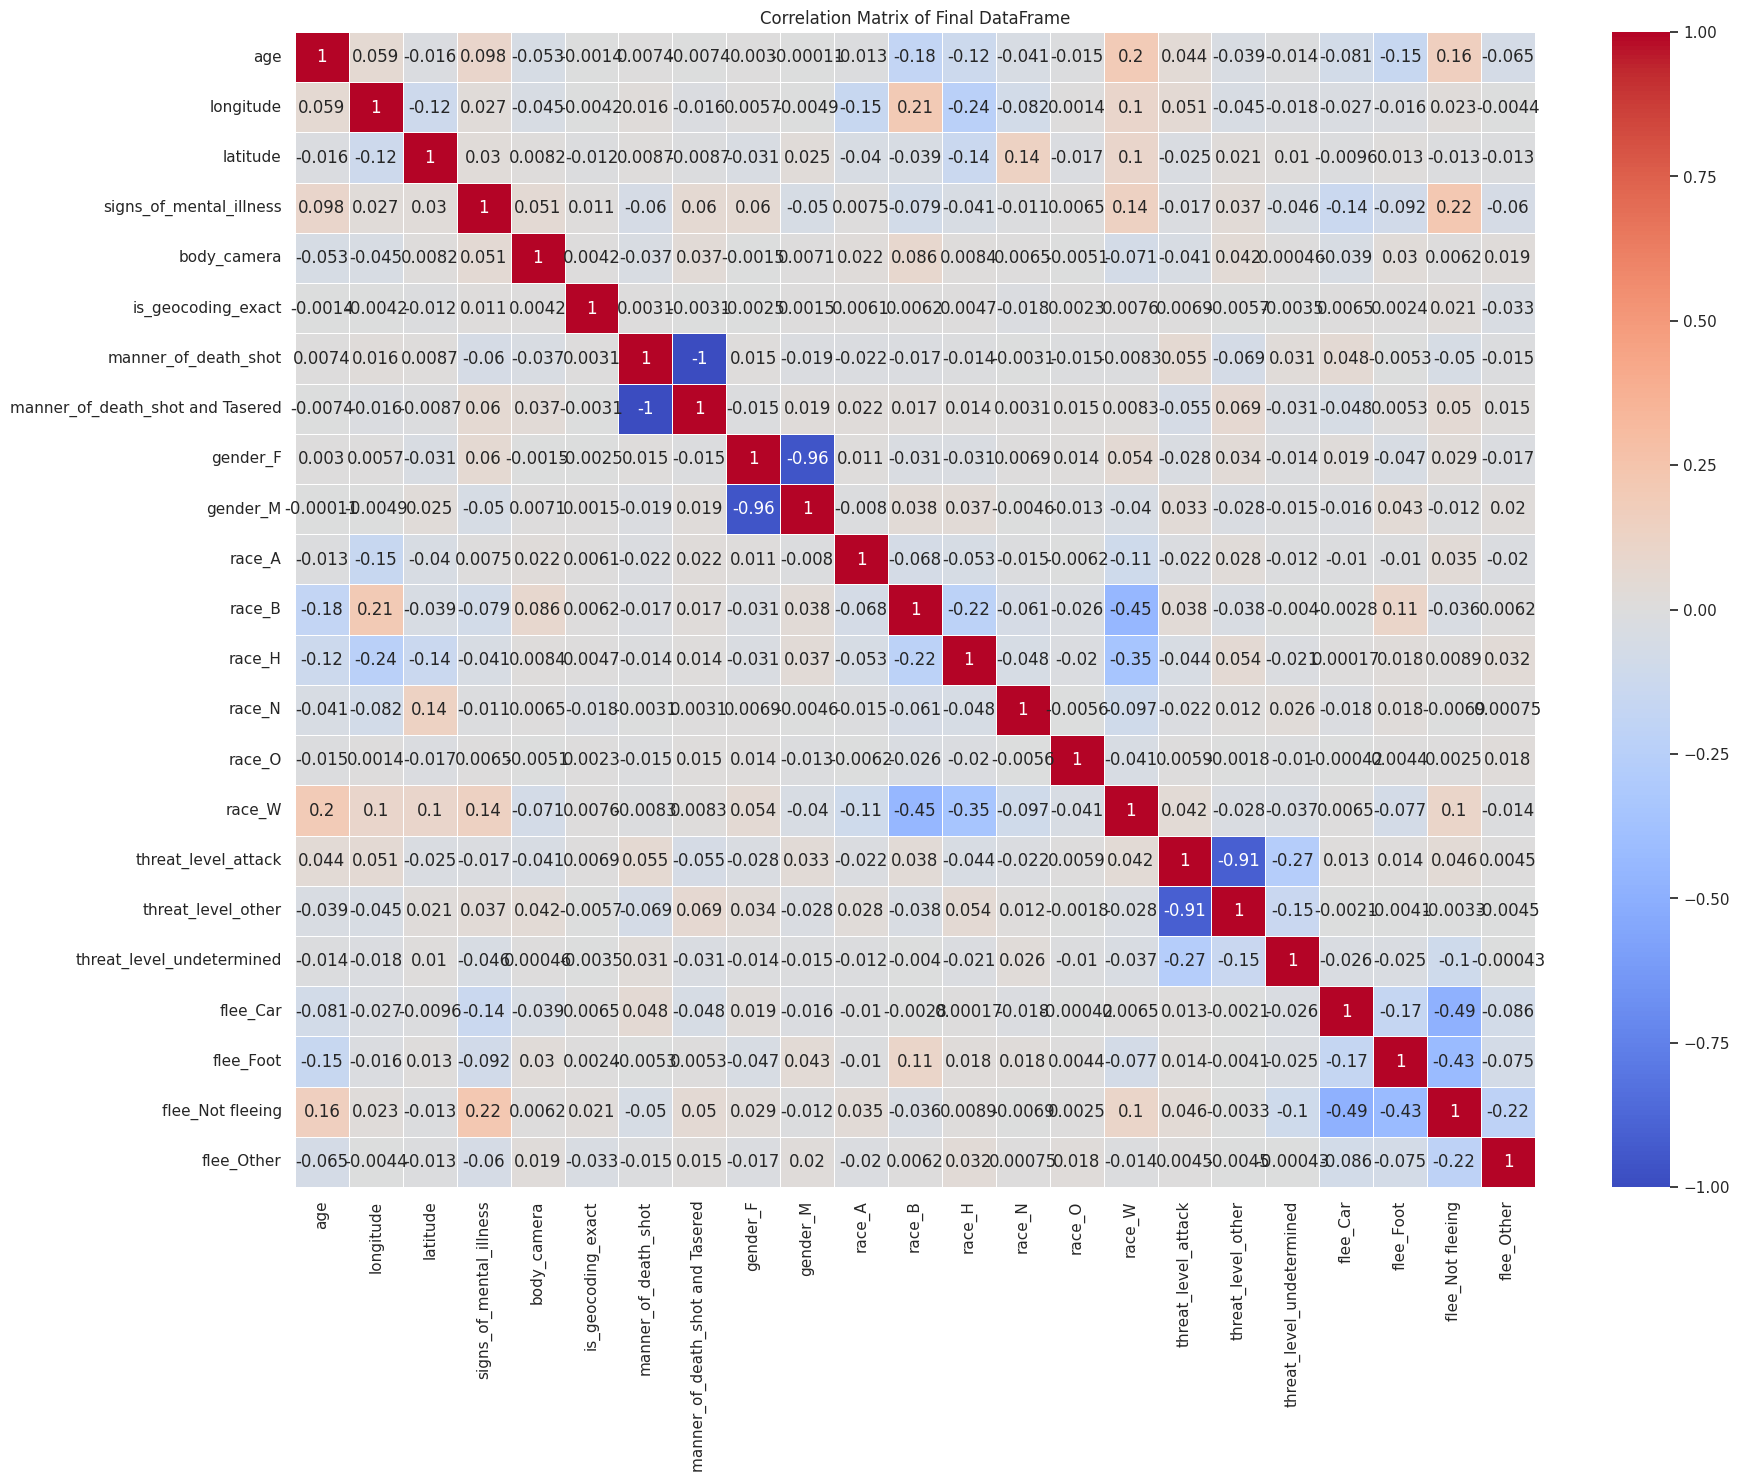

In [21]:
# Compute the correlation matrix
corr_matrix = final_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Add title
plt.title('Correlation Matrix of Final DataFrame')

# Show the plot
plt.show()

### Causal Diagram

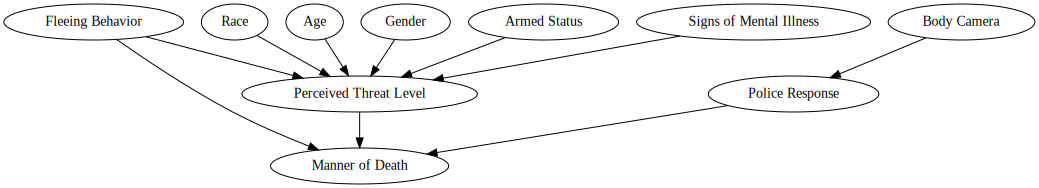

In [22]:
# Create a new directed graph
dot = Digraph()

# Add nodes
dot.node('Race')
dot.node('Age')
dot.node('Gender')
dot.node('Armed Status')
dot.node('Signs of Mental Illness')
dot.node('Fleeing Behavior')
dot.node('Body Camera')
dot.node('Perceived Threat Level')
dot.node('Manner of Death')
dot.node('Police Response')

# Add edges
dot.edge('Race', 'Perceived Threat Level')
dot.edge('Age', 'Perceived Threat Level')
dot.edge('Gender', 'Perceived Threat Level')
dot.edge('Armed Status', 'Perceived Threat Level')
dot.edge('Signs of Mental Illness', 'Perceived Threat Level')
dot.edge('Fleeing Behavior', 'Perceived Threat Level')
dot.edge('Fleeing Behavior', 'Manner of Death')
dot.edge('Perceived Threat Level', 'Manner of Death')
dot.edge('Body Camera', 'Police Response')
dot.edge('Police Response', 'Manner of Death')

# Render the graph
dot.render('causal_diagram', format='png', cleanup=False)
dot

#### Front Door and Back Door Identification from Causal Diagram

In the context of causal inference, identifying front door and back door paths is crucial for understanding the causal relationships and potential confounding variables. Based on the provided causal diagram, we can determine the front door and back door paths as follows:

1. **Front Door Path**:
    - A front door path is a direct causal path from the treatment to the outcome.
    - In the diagram, the direct path from `Perceived Threat Level` to `Manner of Death` represents a front door path.

2. **Back Door Path**:
    - A back door path is an indirect path that goes through a common cause of both the treatment and the outcome, potentially introducing confounding bias.
    - In the diagram, the path from `Race` to `Perceived Threat Level` to `Manner of Death` is an example of a back door path. Here, `Race` is a common cause that affects both `Perceived Threat Level` and `Manner of Death`.
    - Another back door path is from `Signs of Mental Illness` to `Perceived Threat Level` to `Manner of Death`.

By identifying these paths, we can better understand the causal relationships and address potential confounding factors in our analysis.


#### Causal Inference Method

In [ ]:
# Drop the columns that are not required
df_ftl = df_fatal.iloc[:,3:]

In [45]:
# Choose the columns that are required for the analysis
for col in df_fatal.columns[3:]:
    print('Total unique', col, ':', len(df_fatal[col].unique()))

Total unique manner_of_death : 2
Total unique armed : 107
Total unique age : 82
Total unique gender : 3
Total unique race : 7
Total unique city : 3215
Total unique state : 51
Total unique signs_of_mental_illness : 2
Total unique threat_level : 3
Total unique flee : 5
Total unique body_camera : 2
Total unique longitude : 6237
Total unique latitude : 5487
Total unique is_geocoding_exact : 2


In [48]:
# Columns to be used for causal analysis
columns = ['manner_of_death', 'age', 'gender', 'race', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']
df_ftl = df_ftl[columns]
df_ftl

,manner_of_death,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera
0,shot,53.0,M,A,True,attack,Not fleeing,False
1,shot,47.0,M,W,False,attack,Not fleeing,False
2,shot and Tasered,23.0,M,H,False,other,Not fleeing,False
3,shot,32.0,M,W,True,attack,Not fleeing,False
4,shot,39.0,M,H,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...
7997,shot,NaN,M,NaN,False,attack,NaN,False
7998,shot,NaN,M,NaN,False,other,NaN,False
7999,shot,38.0,M,NaN,False,attack,NaN,False
8000,shot,NaN,M,NaN,False,other,NaN,False


In [75]:
# One-hot encode the categorical columns in df_ftl
df_ftl_encoded = pd.get_dummies(df_ftl, columns=['manner_of_death', 'gender', 'race', 'threat_level', 'flee', 'body_camera'], drop_first=True)

# Drop rows with missing values
df_ftl_encoded.dropna(inplace=True)

# Convert the one-hot encoded columns to integers
df_ftl_encoded = df_ftl_encoded.astype(int)

# Display the first few rows of the encoded dataframe
df_ftl_encoded.head()

# Rename column name
df_ftl_encoded = df_ftl_encoded.rename(columns={'manner_of_death_shot and Tasered': 'manner_of_death_shot_and_Tasered'})

#### Two-Stage Least Squares (2 SLS)

#### First Model (First Stage Model)

In [91]:
import statsmodels.api as sm

# Define the formula for the OLS model
formula = "manner_of_death_shot_and_Tasered ~ age + C(gender_M) + C(race_B) + C(race_H) + C(race_N) + C(race_O) + C(race_W) + C(signs_of_mental_illness) + C(threat_level_other) + C(threat_level_undetermined) + C(flee_Foot) + C(flee_Other) + C(body_camera_True)"

# Fit the OLS model
first_model = sm.OLS.from_formula(formula, data=df_ftl_encoded).fit()

# Print the coefficient estimate and p-value for 'signs_of_mental_illness'
print("signs_of_mental_illness coefficient estimate:", first_model.params["age"])
print("signs_of_mental_illness p-value:", first_model.pvalues["age"])


signs_of_mental_illness coefficient estimate: -3.2015338791707136e-05
signs_of_mental_illness p-value: 0.8666888813345222


signs_of_mental_illness coefficient estimate: -3.2015338791707136e-05

signs_of_mental_illness p-value: 0.8666888813345222

- The coefficient estimate of `0.298` suggests that for each unit increase in `signs_of_mental_illness`, the likelihood of the manner of death being "shot and Tasered" increases by `0.298` units.
- The p-value of `4.85e-07` indicates that this effect is statistically significant at the 5% level, suggesting that `signs_of_mental_illness` has a meaningful impact on the dependent variable.

This interpretation helps in understanding the relationship between `signs_of_mental_illness` and the manner of death in the context of the provided data.

#### Second Stage Model

In [93]:
# Define the formula for the second stage model
second_stage_formula = "signs_of_mental_illness ~ C(manner_of_death_shot_and_Tasered) + age + C(gender_M) + C(race_B) + C(race_H) + C(race_N) + C(race_O) + C(race_W) + C(threat_level_other) + C(threat_level_undetermined) + C(flee_Foot) + C(flee_Other) + C(body_camera_True)"

# Fit the second stage model
second_stage_model = sm.OLS.from_formula(second_stage_formula, data=df_ftl_encoded).fit()

# Print the coefficient estimate and p-value for 'signs_of_mental_illness'
print("manner_of_death_shot_and_Tasered coefficient estimate:", second_stage_model.params["age"])
print("manner_of_death_shot_and_Tasered p-value:", second_stage_model.pvalues["age"])

manner_of_death_shot_and_Tasered coefficient estimate: 0.0019112335758152941
manner_of_death_shot_and_Tasered p-value: 3.233359796225889e-07


manner_of_death_shot_and_Tasered coefficient estimate: 0.0019112335758152941

manner_of_death_shot_and_Tasered p-value: 3.233359796225889e-07

#### Estimated Effect

In [94]:
second_stage_model.params["age"] / first_model.params["age"]

np.float64(-59.697434040909066)

- Once more, it is evident that the coefficient remains consistent with the previously obtained results. 
- An added advantage is the availability of valid standard errors. 
- This conclusion rests on a more robust foundation due to the incorporation of valid standard errors, lending greater reliability to our findings.

In [95]:
# another way to use iv2sls is by passing formula
formula = "manner_of_death_shot_and_Tasered ~ C(signs_of_mental_illness) + age + C(gender_M) + C(race_B) + C(race_H) + C(race_N) + C(race_O) + C(race_W) + C(threat_level_other) + C(threat_level_undetermined) + C(flee_Foot) + C(flee_Other) + C(body_camera_True)"

iv2sls = IV2SLS.from_formula(formula, df_ftl_encoded).fit()

iv2sls.params["age"]

np.float64(-3.20153387917032e-05)